## Материалы
https://disk.yandex.ru/i/9H0fyGw5sEc_Og

## Описание проекта

В рамках проекта предстоит выяснить какие из доступных показателей характеризуют клиентов, принявших решение, закончить свои взаимоотношения с банком "Метанпромбанк". Мы попытаемся определить, есть ли какие-то паттерны в данных у клиентов покидающих банк. Для этого, проанализируем данные в разрезе двух групп по признаку оттока и решим задачу кластеризации.

__Проект состоит из нескольких этапов:__
- __Загрузка и предобработка данных.__
    - Обзор данных
    - Приведение данных к единому стилю
    - Проверка типов данных
    - Проверка на наличие пропусков и дубликатов
    - Обработка пропусков и дубликатов. Посмотрим на природу возникновения пропусков и дубликатов, попробуем найти способы восстановления пропущенных значений
- __Исследовательский анализ данных.__
    - Анализ распределения значений переменных. Посмотрим как распределены значения переменных в данных, для этого построим визуализацию распределений
    - Посмотрим на описательные статистики переменных (среднее, медианна).
    - Построим матрицу корреляций. По матрице мы сможем проверить наличие зависимостей между переменными.
    - На основе исследования переменных, выделим несколько признаков для дальнейшей сегментации клиентов по количеству продуктов
    - Исследование оттока в разрезе признаков и\или их диапазонов
- __Проверка гипотез.__
    - В этом блоке построим доверительные интервалы по выделенным признакам сегментации
    - Формирование выборок
    - Формулировки гипотез, выбор и обоснование статистического теста
    - Проверка гипотезы и интерпретация результата
- __Промежуточный итог__
    - Краткий итог по проделанной работе. Описание потенциальных признаков для сегментации и их взаимосвязей.
- __Кластеризация на основе выделенных признаков.__
    - Сформируем несколько кластеров пользователей
    - Определим какие признаки характерны для кластеров
    - На основе ключевых показателей выделим несколько наиболее приоритетных
- __Выводы и рекомендации для заказчика.__
    - Это финальный блок в котором, будут подведены глобальные выводы по признакам наиболее влияющим на отток пользователей на основе составленной сегментации. Будут даны рекомендации по дальнейшим действиям для предотвращения оттока
- __Формирование конечного результата.__
   - Составление презентации и дашборда по результатам проведенного теста

__Описание данных__

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

In [1]:
! pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
from scipy import stats as st
import phik
import plotly.express as px
from plotly.subplots import make_subplots
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score
from itertools import *
import random

In [3]:
wr.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

### Загрузка и предобработка данных 

In [4]:
def data_proc (data):
    """
    Функция будет выводить информацию о явных дубликатах
    и пропусков в данных 
    """
    duplicated_sum = data.duplicated().sum()
    gap_sum = data.isna().sum()
    print(data.info())
    print()
    print('Количество явных дубликатов:', duplicated_sum)
    print('Количество пропусков:')
    print(gap_sum)
    

In [5]:
try:
    df = pd.read_csv('C:/Users/crugl/Documents/Проекты/bank_scrooge.csv')
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')  

In [6]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [7]:
data_proc(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295

Приведём названия столбцов к общему виду и обработаем пропуски в столбцах balance и age

In [8]:
df.columns = [name.replace('ID', '_id') for name in df.columns]
df.columns = df.columns.str.lower()

__age__

In [9]:
df.loc[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,"7,601,719.20",2,1,1,"408,121.16",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,"135,693.24",0
3091,138660,836.00,Ростов,Ж,NaN,5,"294,315.53",2,0,1,"63,310.22",1
4912,210674,834.00,Рыбинск,М,NaN,1,"238,330.52",2,0,1,"93,775.06",0
5470,218868,827.00,Рыбинск,Ж,NaN,4,"448,959.07",2,1,1,"67,835.95",0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.77",0
7236,210135,908.00,Рыбинск,Ж,NaN,4,"1,120,340.31",3,1,1,"85,002.15",0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,"159,248.67",0
7345,184913,829.00,Ярославль,Ж,NaN,3,"188,648.77",2,0,1,"75,206.90",0


Вижу 3 варианта, как можно обработать пропущенные значения:
- Проверить есть ли дублирующиеся записи по полю user_id и city. Идея в том, чтобы посмотреть, есть ли в одном городе клиенты с одинаковым user_id. Если такие есть, то можно предположить, что имеет место ошибка при вводе данных, например для одного и того же клиента заводилось две карточки, одна с одним продуктом, а другая с другим.
- Заполнить синтетическими значениями, например средним или медианой. 
- Удалить строки с пропусками, их менее 1% от общего количества данных, поэтому этот вариант тоже можно рассматривать

In [10]:
user_list = df.loc[df['user_id'].duplicated() & df['age'].isna()]['user_id']

In [11]:
df.query('user_id in @user_list').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.00,Ярославль,М,NaN,0,NaN,1,1,1,"117,197.56",0
4443,127440,846.00,Рыбинск,М,66.00,1,"57,405.67",2,0,1,"17,831.63",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
4212,140934,919.00,Ярославль,Ж,29.00,4,"603,946.18",3,0,1,"158,438.79",0
4343,141945,929.00,Рыбинск,М,33.00,0,NaN,1,1,0,"381,868.89",0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,"381,868.89",0
3683,151662,960.00,Ярославль,Ж,37.00,4,"2,527,032.70",4,1,0,"231,648.50",0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.77",0
6670,163657,903.00,Рыбинск,М,45.00,4,"1,343,339.70",4,0,1,"83,741.65",0
9667,163657,849.00,Ярославль,М,NaN,4,"1,254,013.85",2,1,1,"119,106.67",0


Просмотрев данные, можно сделать вывод о том, что дублирующиеся user_id находятся в разных городах и нет оснований, чтобы связать их между собой.

Остается два варианта, либо заполнять средними синтетическими данными, либо удалять.
Можно заполнить возраст средним значениям в зависимости от наличия кредитной карты. Выбор именно такого подхода можно объяснить тем, что для получения кредитной карты, банк выставляет определенные условия по доходу и прочим параметра. Не каждый 18-ти летний молодой человек может получить кредитную карту.

In [12]:
for i in df['credit_card'].unique():
    df.loc[(df['credit_card'] == i) & (df['age'].isna()), 'age'] = \
    df.loc[(df['credit_card'] == i), 'age'].mean()

__balance__

Есть несколько предположений
1. Пропуски связаны с количеством продуктов. Мы не знаем баланс какого именно счёта отражает столбец balance. Если, например, в столбце balance отображается баланс расчётного счёта, то у людей открывших депозит в банке, могут быть пропуски в этом столбце.
2. Возможно есть какая-то географическая зависимость, например, в офисах какого-то города был сбой.
3. Пропуски в balance означают нулевой баланс.



Начнём со сравнения количества продуктов среди тех клиентов у кого есть пропуски в balance и остальных

In [13]:
balance = df.dropna(subset=['balance'])

In [14]:
nan_balance = df.loc[df['balance'].isna()]
nan_balance.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,"196,820.07",0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,"217,469.48",0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,"147,094.82",0


In [15]:
balance.groupby('products')['user_id'].count()

products
1    1391
2    4811
3    1010
4     474
5      19
Name: user_id, dtype: int64

In [16]:
nan_balance.groupby('products')['user_id'].count()

products
0       1
1    1950
2     315
3      29
Name: user_id, dtype: int64

На основе полученных данных нельзя утверждать, что отсутствие значений в поле balance как-то связано с количеством продуктов клиентов. 

Теперь посмотрим на разбивку по наличию кредитных карт.

In [17]:
balance.groupby('credit_card')['user_id'].count()

credit_card
0    2773
1    4932
Name: user_id, dtype: int64

In [18]:
nan_balance.groupby('credit_card')['user_id'].count()

credit_card
0     423
1    1872
Name: user_id, dtype: int64

Сутауция аналогично, нельзя утверждать пропущенные значения как-то связаны с наличием кредитных карт.

Посмотрим есть ли клиенты с нулевым балансом

In [19]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18.00,0,0.00,2,1,1,"64,548.33",0
6757,148456,813.00,Ярославль,М,20.00,2,0.00,2,1,0,"23,876.51",0


Два клиента с нулевым балансом присутствуют в данных, значит пропущенные значения не могут интерпретироваться как нулевой баланс.

Так как пропусков достаточно много, удалять их нецелесообразно, мы можем потерять большое количество нужных нам для дальнейшего исследования данных. Пропуски оставляем.

Теперь посмотрим есть ли в наших данных аномальные значения

In [20]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.16,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


В столбцах balance и est_salary есть аномальные значения. Избавимся от них, отрежем по 1% данных.

In [21]:
len(df)

10000

In [22]:
np.percentile(df['est_salary'], [90, 95, 97, 99])

array([242395.782 , 316885.3445, 453350.7859, 887903.8546])

In [23]:
np.percentile(balance['balance'], [1, 2, 5, 90, 95, 97, 99]) 

array([  23267.4184,   47675.348 ,  100104.32  , 1460133.708 ,
       2116704.784 , 2822284.6468, 4827443.494 ])

In [24]:
df = df.loc[(df['balance'].isna()) | (df['balance'] <= 2822284)].query('est_salary <= 453350')

In [25]:
len(df)

9534

### Исследовательский анализ

Исследовательский анализ начнем с матрицы корреляций, оценим взаимосвязь между переменными.

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


Text(0.5, 1.0, 'Корреляционная матрица')

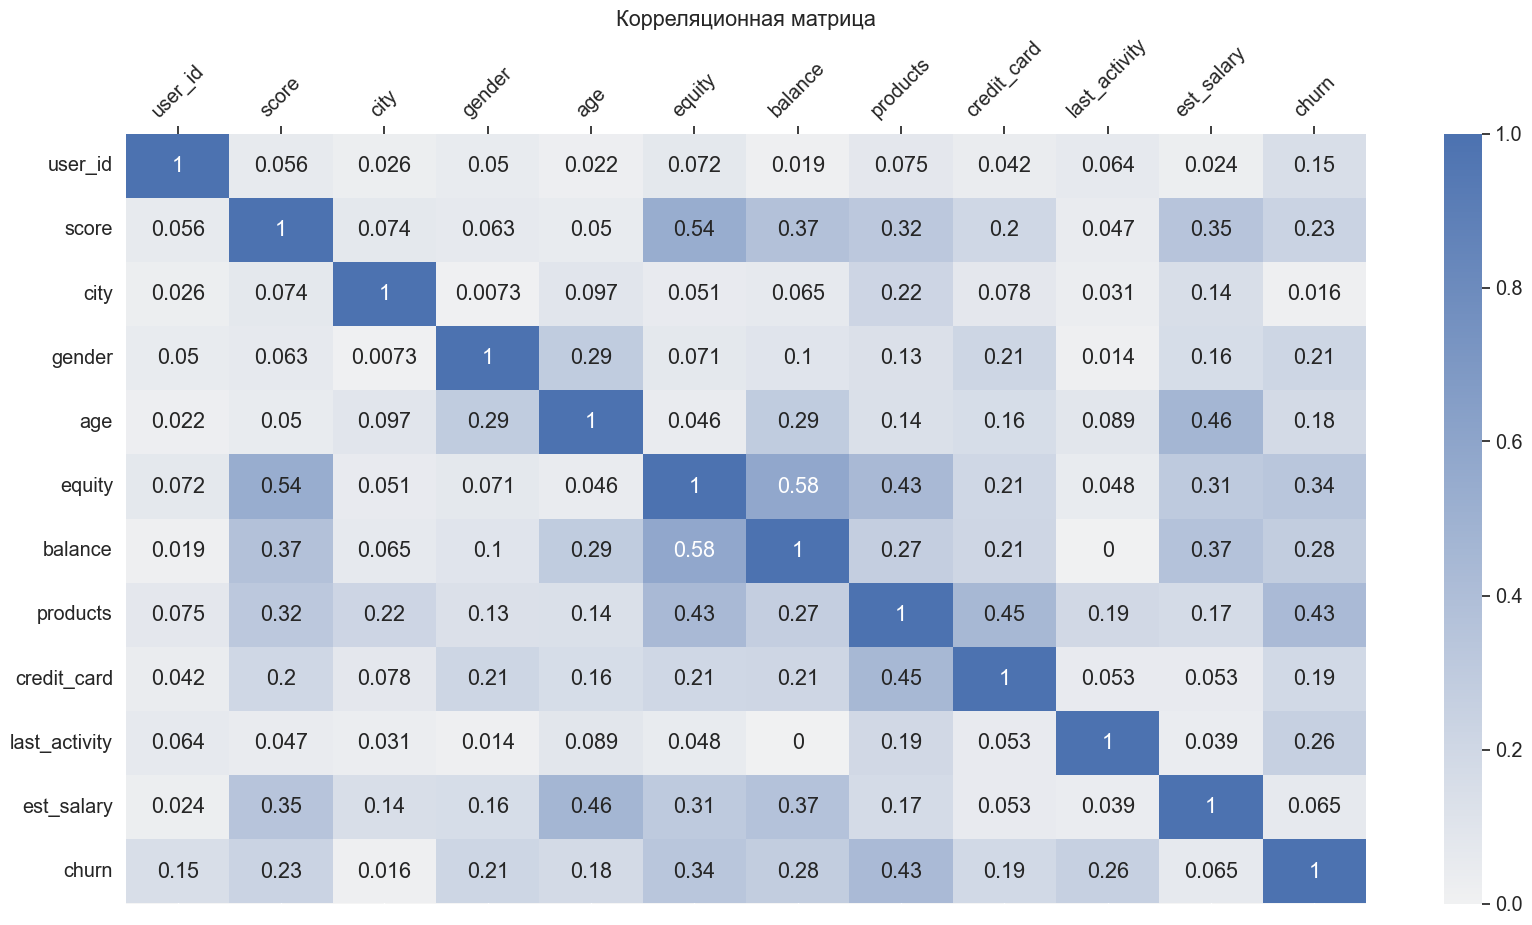

In [26]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
ax = sns.heatmap(data=df.phik_matrix(), annot=True, cmap=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.title('Корреляционная матрица')

Каких-то ярковыраженных зависимостей между переменной churn и остальными не видно, интересно что наиболее тесная связь у переменной churn с gender

Исследовательский анализ будем проводить в разрезе двух подгрупп: пользователей, которые ушли или изъявили желание уйти и оставшихся пользователей.

Также мы разобьем изначальный датасет на два: с количественными переменными и качественными, для удобной визуализации.

In [27]:
def visual_quanti (column):
    """
    Функция визуализирует распределение данных
    """
    if column == 'churn':
        pass
    else:
        sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
        
        sns.histplot(data=quanti_variables, x=quanti_variables[column], 
                     hue=quanti_variables['churn'],
                     palette=['#4682B4', '#01939A'], kde=True, 
                     stat='density', common_norm=False)#4682B4 #01939A
        plt.ylabel('Вероятность')
        plt.title(column)
        plt.xlabel('')
        plt.show()

In [28]:
def stats (column):
    """
    Функция возвращает описательные статистики данных
    """
    if column =='churn':
        pass
    else:
        describe = quanti_variables[column].describe().T
        mode = st.mode(quanti_variables[column]).mode[0]
        mode_count = st.mode(quanti_variables[column]).count[0]
        mode_percent = mode_count/len(quanti_variables[column])
        print(describe)
        print()
        print('Мода столбца:', mode)
        print('Сколько раз в столбце встречается мода:', mode_count)
        print('Процент моды от данных в столбце:', '{:.2%}'.format(mode_percent))

In [29]:
def mean_med (column):
    """
    Функция возвращает описательные статистики данных
    """
    if column =='churn':
        pass
    else:
        mean_1 = quanti_variables.query('churn == 1')[column].mean()
        mean_0 = quanti_variables.query('churn == 0')[column].mean()
        median_1 = quanti_variables.query('churn == 1')[column].median()
        median_0 = quanti_variables.query('churn == 0')[column].median()
        print('Среднее значение по уходящим клиентам', mean_1)
        print('Медиана по уходящим клиентам', median_1)
        print()
        print('Среднее значение по остальным клиентам', mean_0)
        print('Медиана по остальным клиентам', median_0)

Начнём с количественных переменных

In [30]:
quanti_variables = df[['score', 'age', 'est_salary', 'balance','churn']]
quanti_variables = (
                    quanti_variables
                    .rename(columns={'score':'Баллы кредитного скоринга', 
                                     'age':'Возраст', 
                                     'balance':'Баланс', 
                                     'credit_card':'Наличие кредитной карты',
                                     'est_salary':'Оценочный доход клиента'} )
                   )

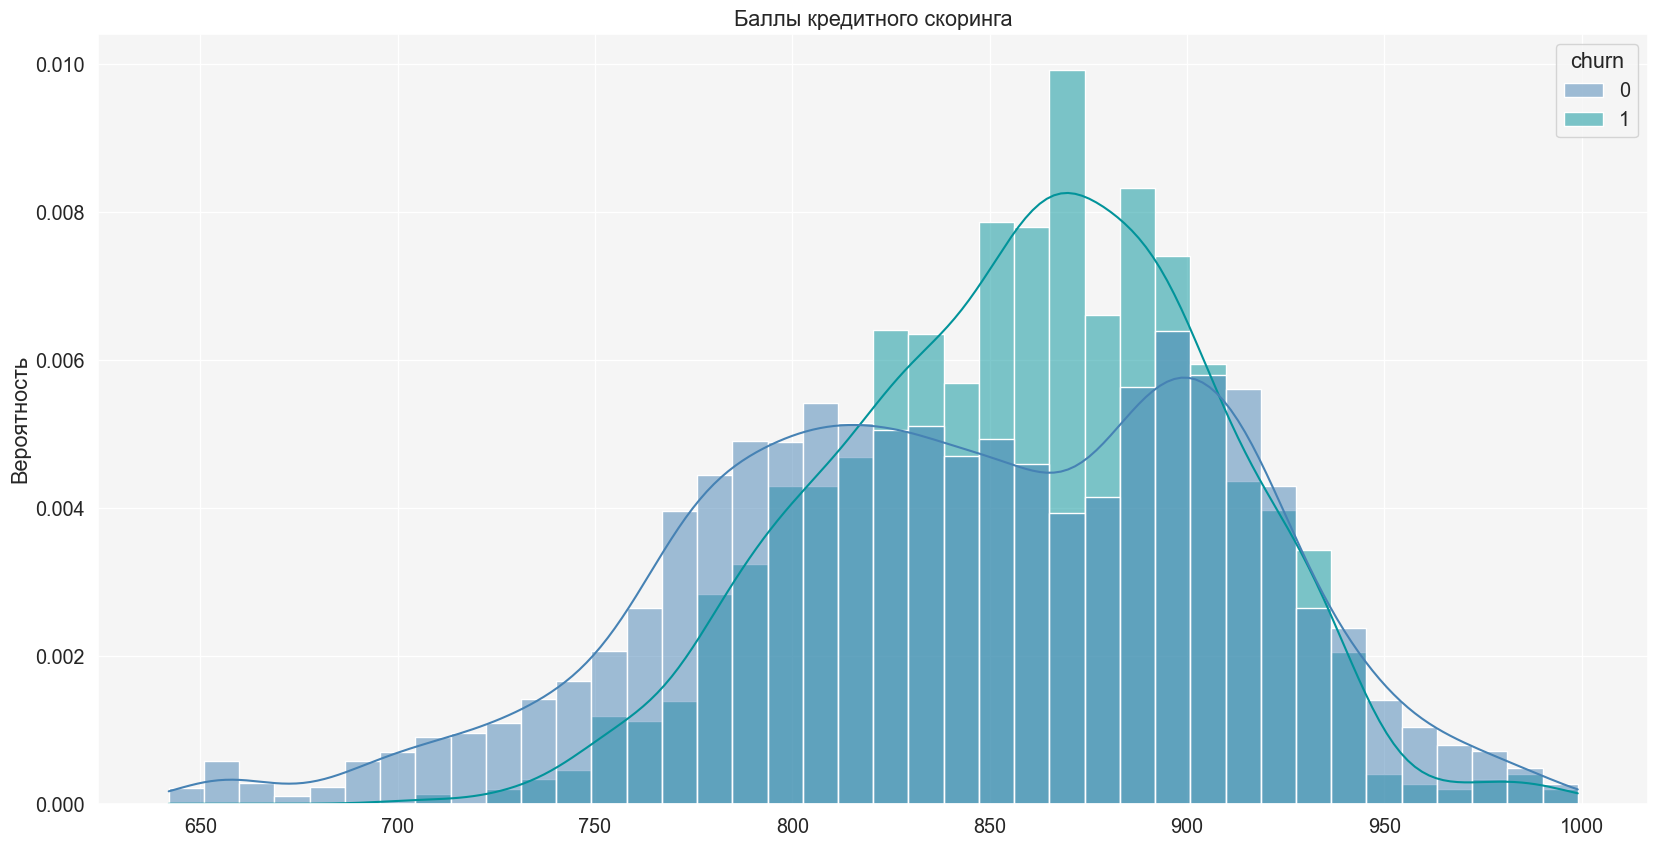

Среднее значение по уходящим клиентам 858.9610849056604
Медиана по уходящим клиентам 863.0

Среднее значение по остальным клиентам 843.5840775708089
Медиана по остальным клиентам 846.0


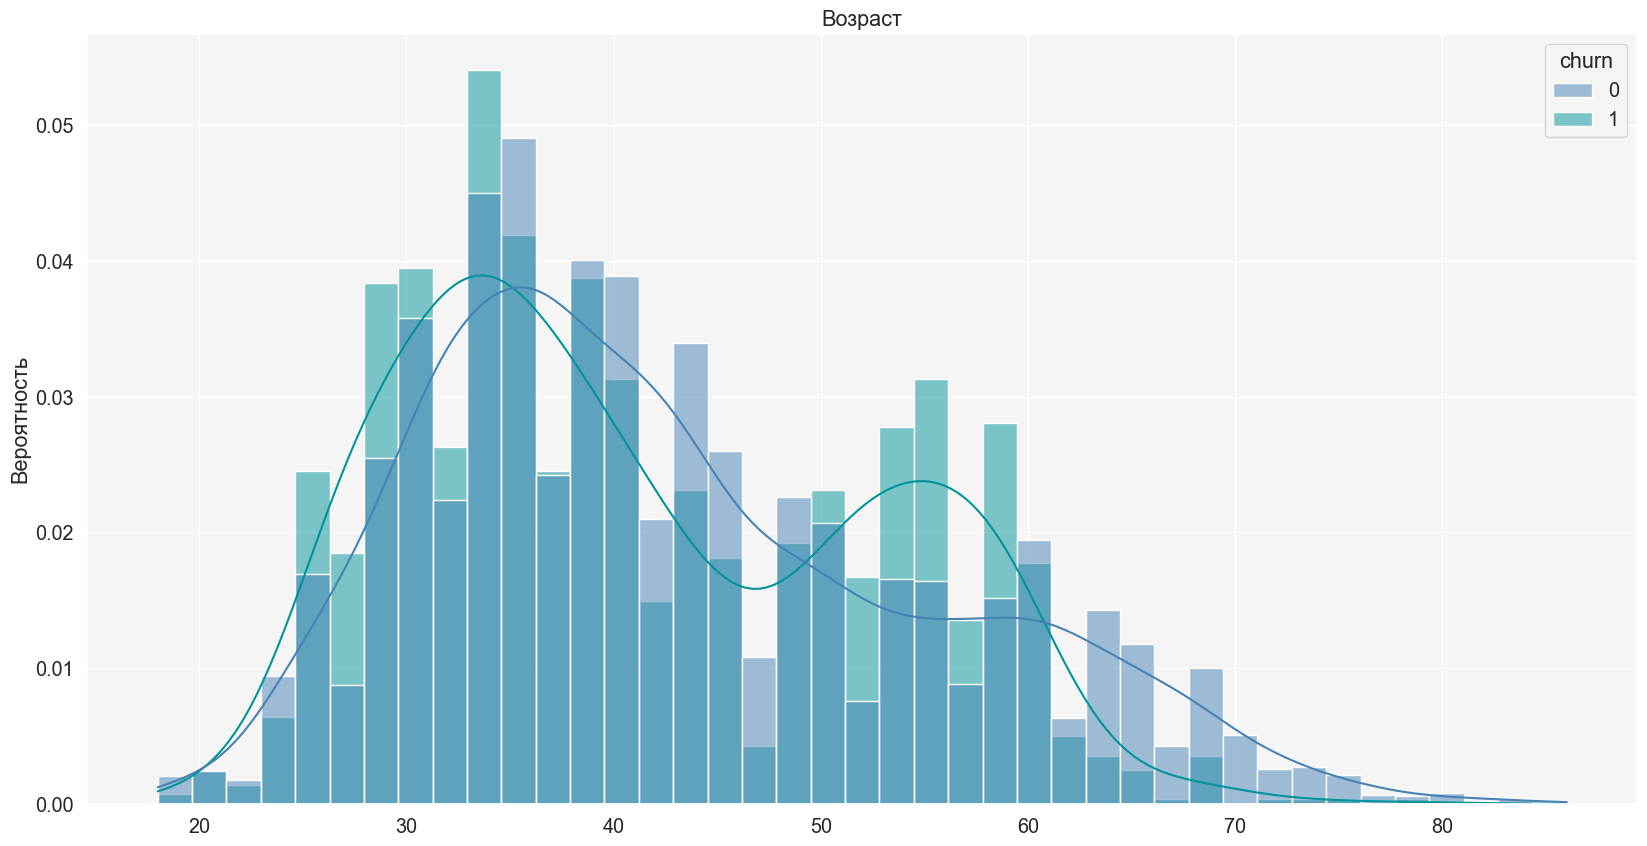

Среднее значение по уходящим клиентам 41.272948889513216
Медиана по уходящим клиентам 39.0

Среднее значение по остальным клиентам 42.964927361011554
Медиана по остальным клиентам 40.0


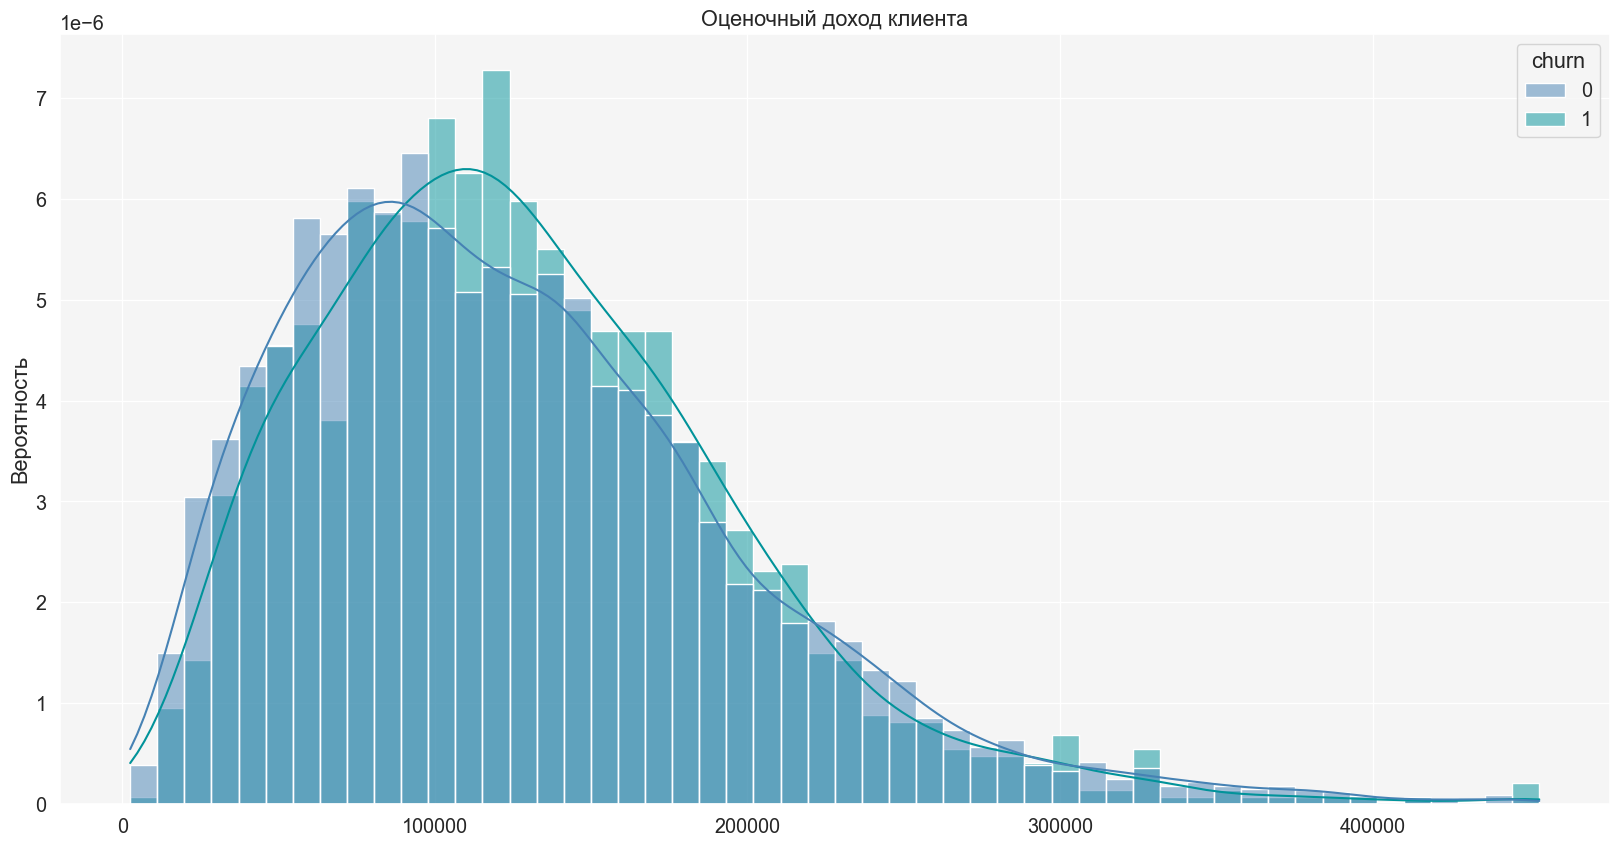

Среднее значение по уходящим клиентам 128501.64905070757
Медиана по уходящим клиентам 120015.67000000001

Среднее значение по остальным клиентам 125278.17035085481
Медиана по остальным клиентам 114659.34


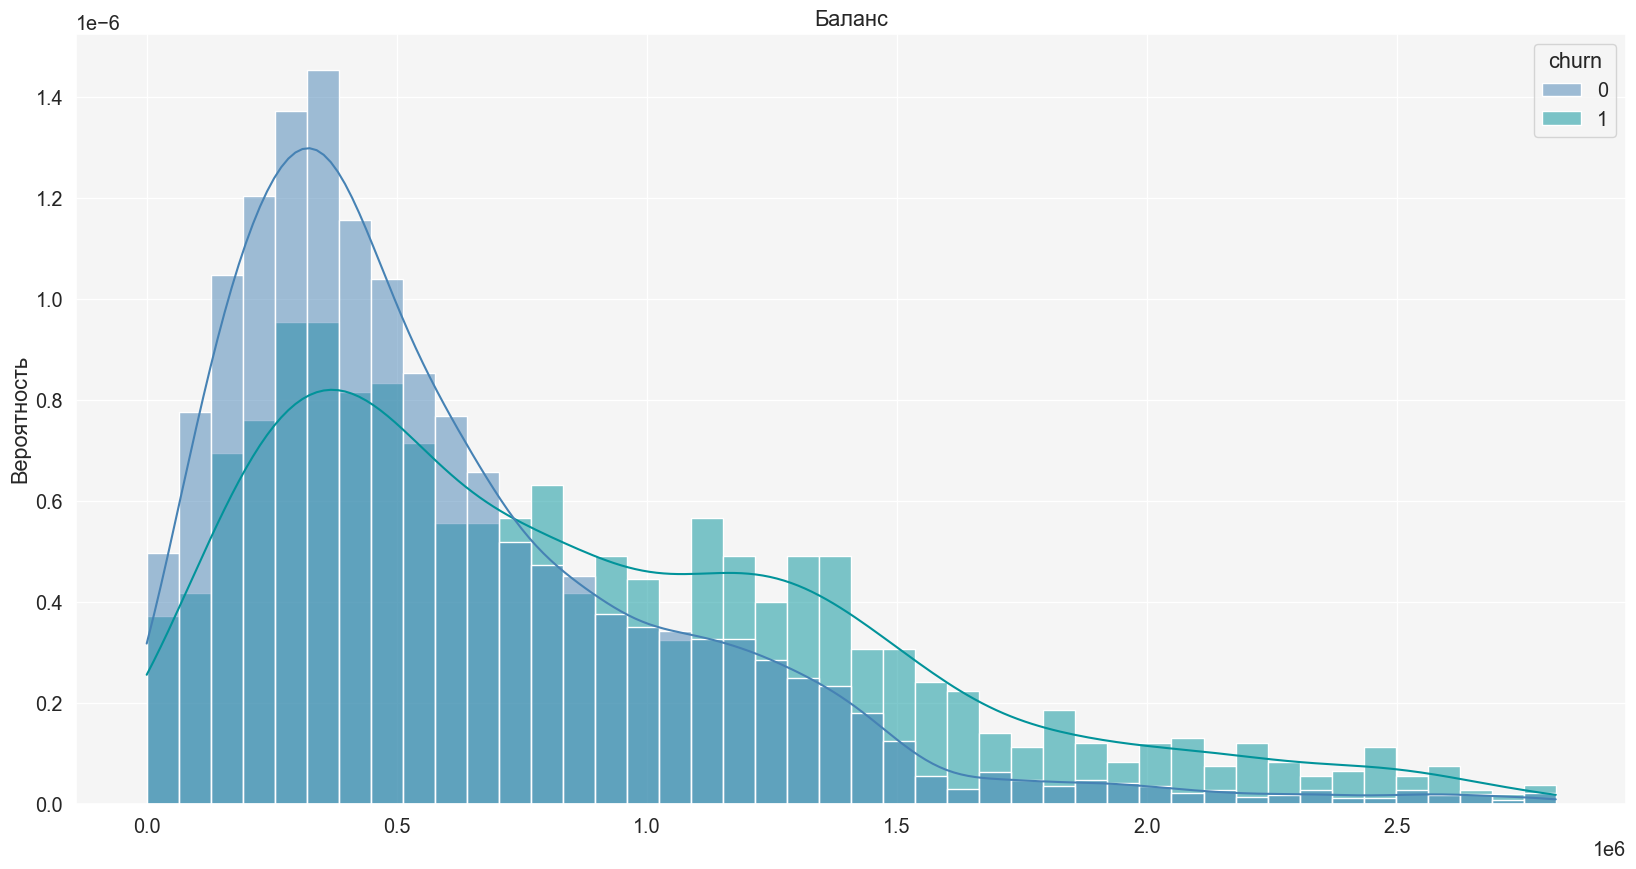

Среднее значение по уходящим клиентам 856368.2641459074
Медиана по уходящим клиентам 726668.73

Среднее значение по остальным клиентам 598236.0076072981
Медиана по остальным клиентам 466066.29


In [31]:
for i in quanti_variables.columns:
    visual_quanti(i)
    mean_med(i)

__Вывод__

- В среднем возраст уходящих клиентов, меньше чем у остальных;
- Клиенты в возрасте 25-35 и 50-60 лет с большей вероятностью являются уходящими;
- Средний оценочный доход и баллы кредитного скоринга выше у клиентов оттока;
- Клиенты с кредитным скорингом в диапазоне 830-900 баллов с большей вероятностью относятся к оттоку;
- Клиенты с доходом 100000-230000 с большей вероятностью относятся к оттоку;
- Вероятность того, что клиент с балансом выше 1000000 будет принадлежать к оттоку выше, чем с балансом ниже 1000000

Теперь посмотрим на качественные и дискретные количественные переменные

In [33]:
quali_variables = df[['city', 'gender', 'credit_card', 'last_activity', 'products','equity', 'churn']]
quali_variables = (
                    quali_variables
                    .rename(columns={'city':'Город', 'gender':'Пол', 
                                     'credit_card':'Наличие кредитной карты', 
                                     'last_activity':'Активность клиента', 
                                     'equity':'Количество баллов собственности', 
                                     'products':'Количество продуктов клиента'})
                   )


In [34]:
for col in quali_variables.columns:
    if col == 'Наличие кредитной карты':
        quali_variables[col] = quali_variables[col].replace([1, 0], ['Есть', 'Нету'])
    elif col == 'Активность клиента':
        quali_variables[col] = quali_variables[col].replace([1, 0], ['Активный', 'Неактивный'])

In [35]:
def barPerc(df,xVar,ax):
    """"
    Функция добавляет метки процентного соотношения на диаграмму
    """
    
    numX=len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches
    
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [36]:
def visual_quali (column):
    """
    Функция визуализирует распределение данных
    """
    if column == 'churn':
        pass
    else:
        ax = sns.countplot(data=quali_variables, x=column, hue='churn',palette=['#4682B4', '#01939A'])
        barPerc(quali_variables, column, ax)
        plt.ylabel('Количество')
        plt.title(column)
        plt.xlabel('')
        plt.show()

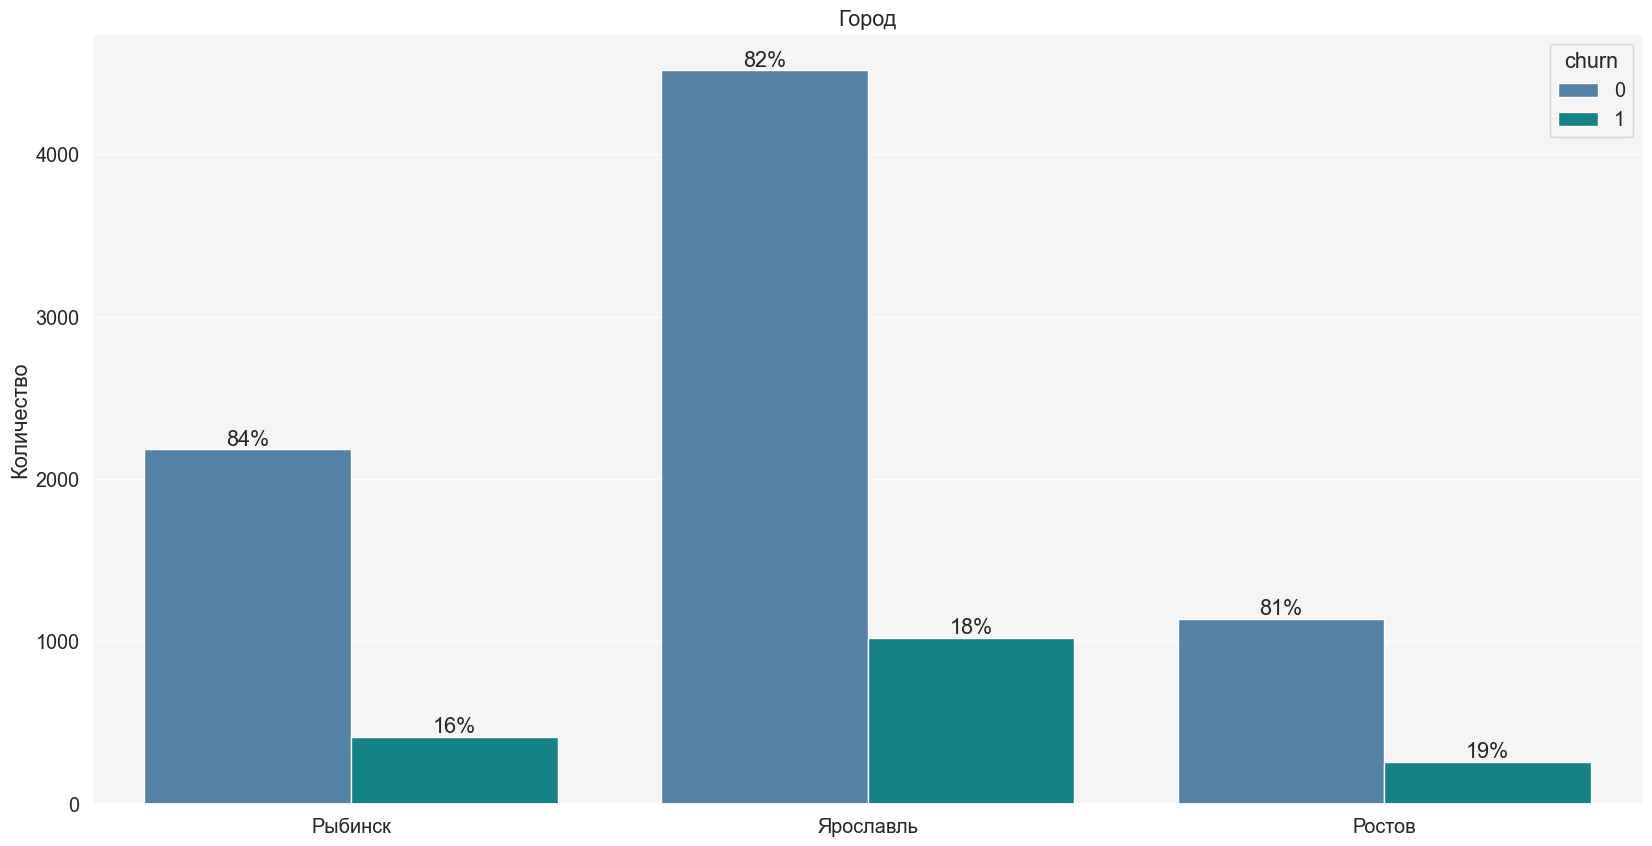

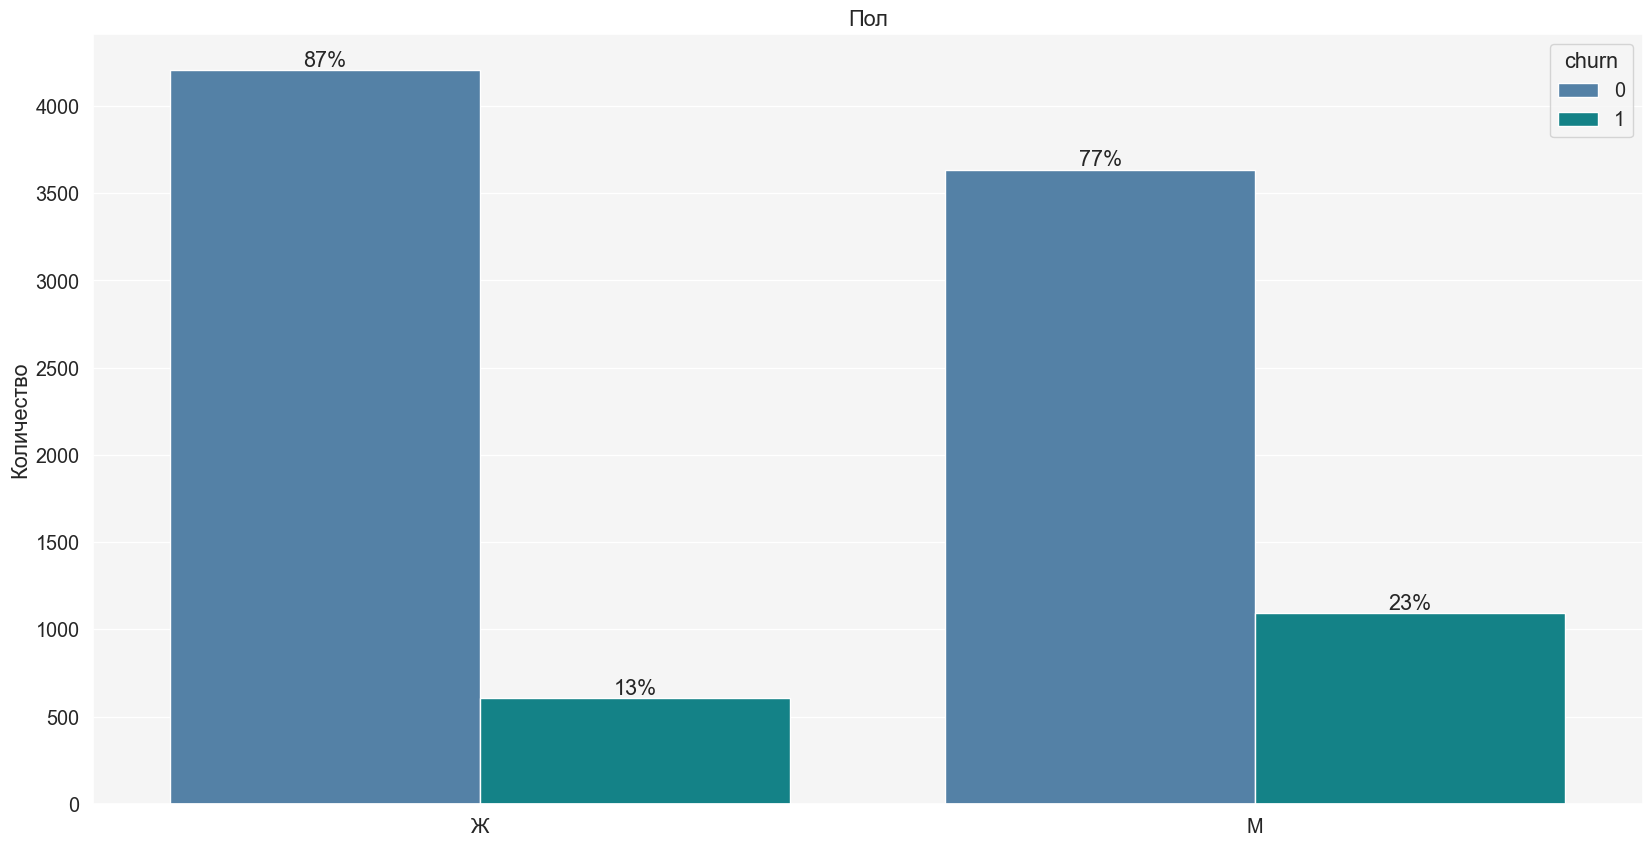

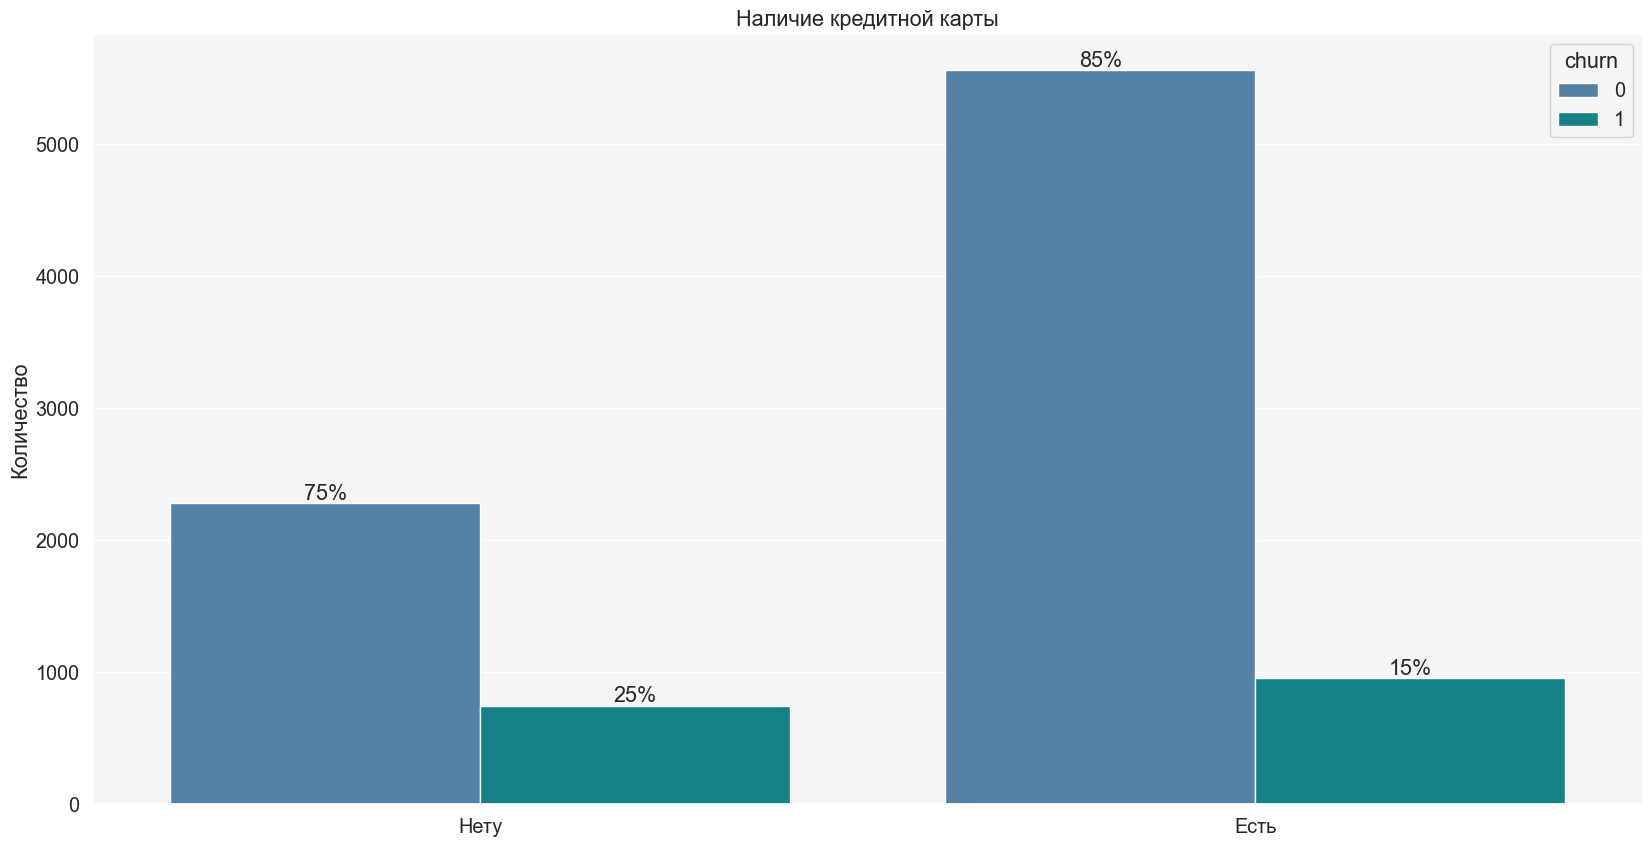

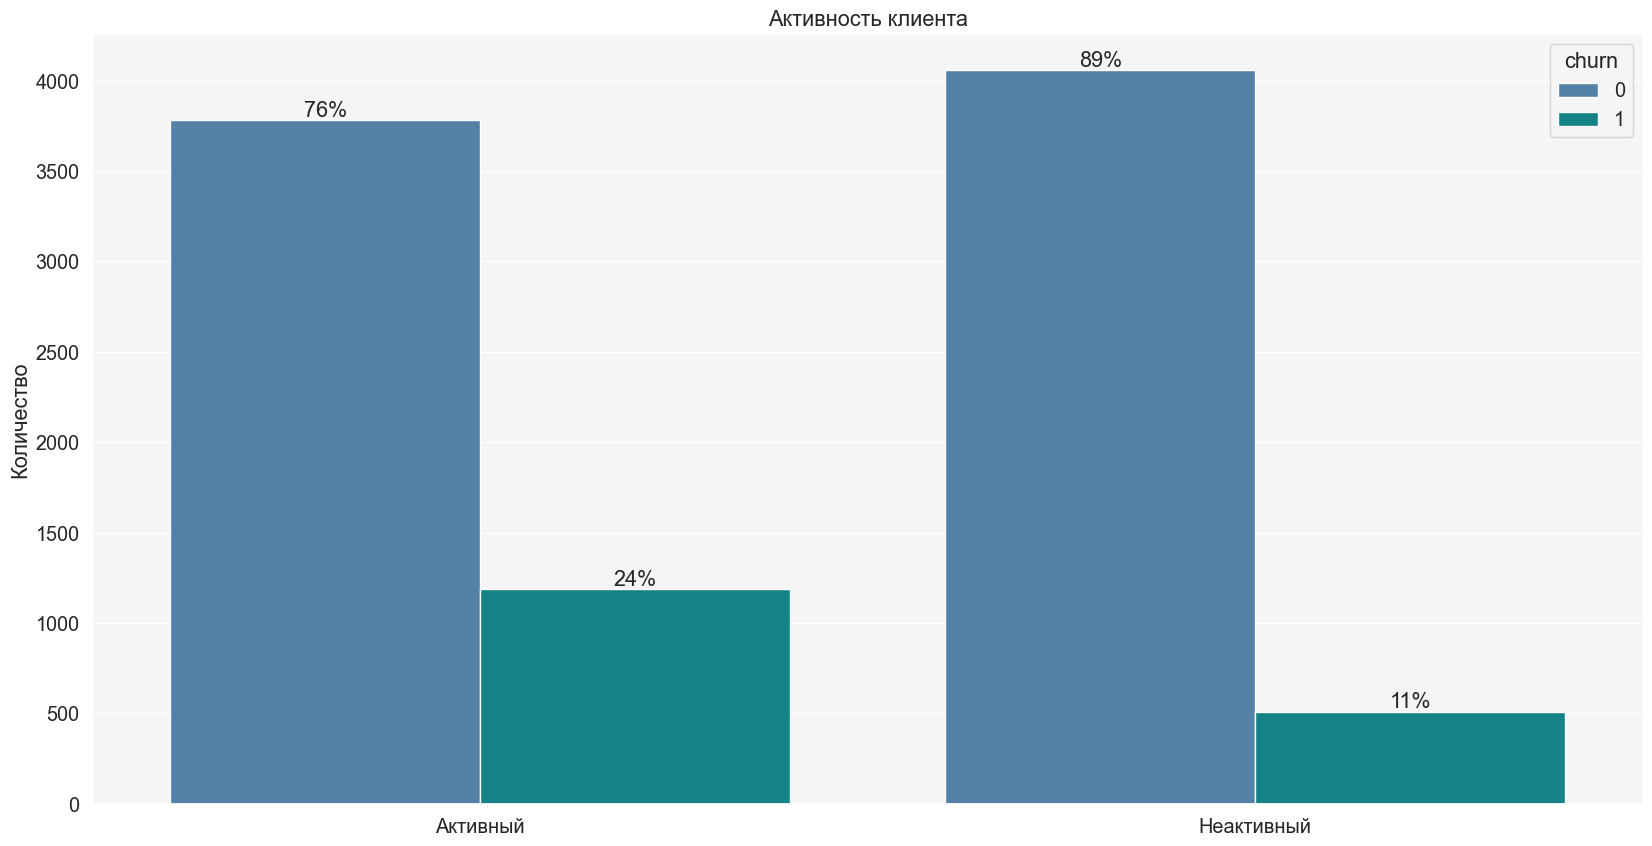

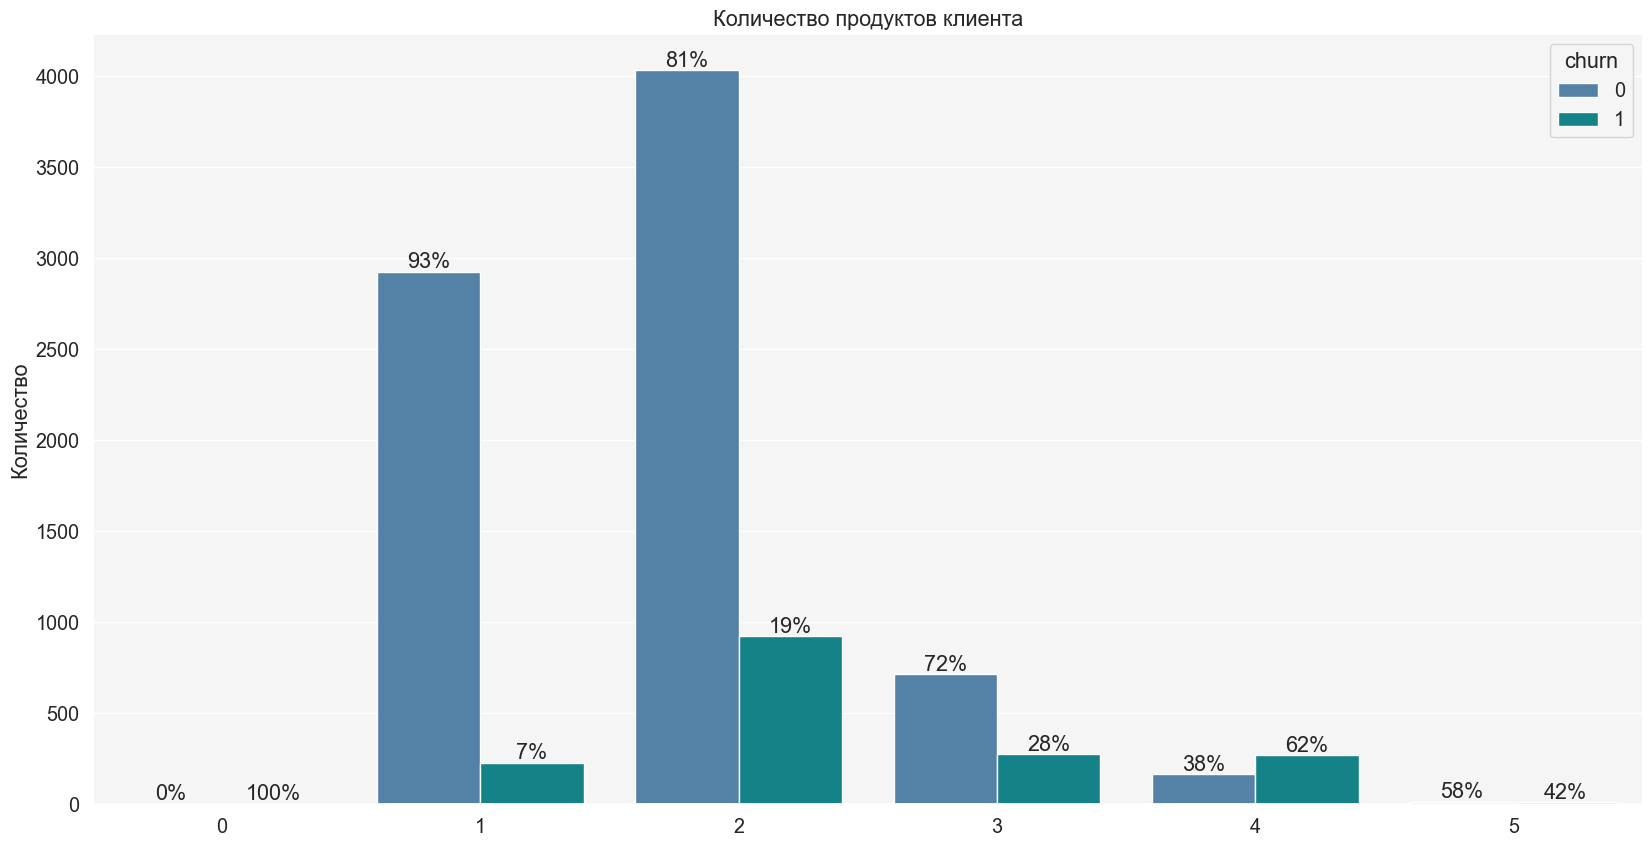

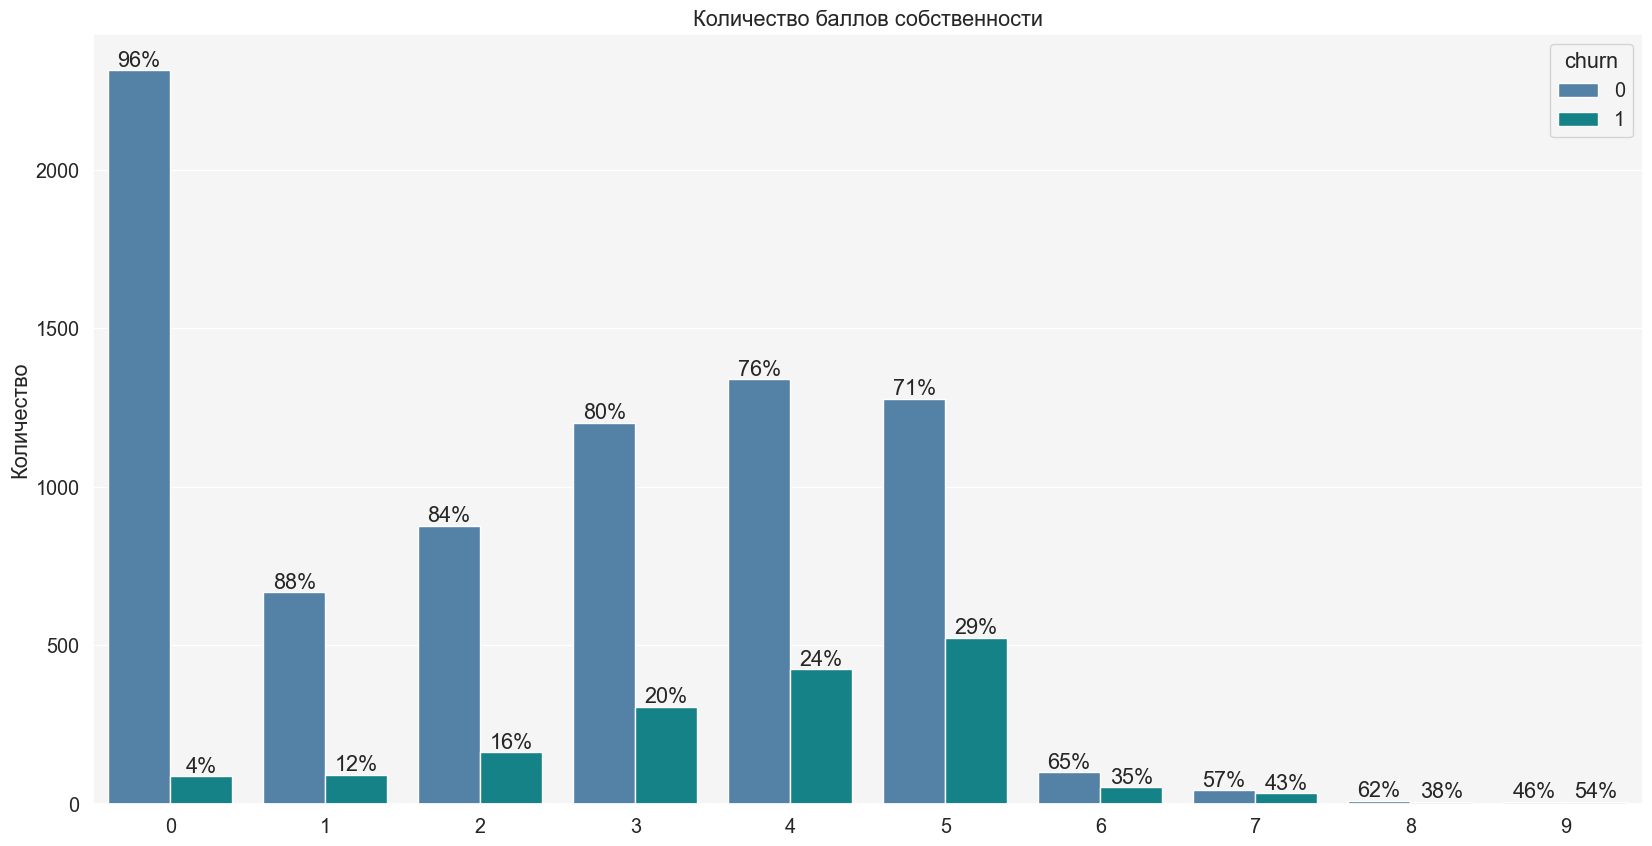

In [37]:
for col in quali_variables.columns:
    visual_quali(col)

__Выводы__

Рассмотрели качественные и количественные дискретные переменные, можно сделать следующие выводы:
- В Ростове самая высокая доля оттока;
- Доля оттока, выше среди клиентов, неимеющих кредитной карты;
- Среди активных клиентов, отток выше, чем среди неактивных;
- С увеличением количества продуктов клиента, растёт доля оттока;
- Чем выше количество баллов собственности, тем выше доля оттока.

### Проверка гипотез

Мы выделили несколько гипотез:

- Средний возраст среди клиентов, пользующихся двумя продуктами банка равен среднему возрасту клиентов пользующихся одинм продуктом
- В среднем возраст у уходящих клиентов меньше чем у остальных
- Кредитный скоринг выше у уходящих клиентов чем у остальных
- Оценочный доход клиентов решивших уйти больше чем у оставшихся

Проверять гипотезы будем на 5% уровне статистической значимости

Для того, чтобы определить, какой сатистический критерий использовать, проверим выборки на нормальность распределения.

$H_0$ :Средний возраст среди клиентов, пользующихся двумя продуктами банка равен среднему возрасту клиентов пользующихся одинм продуктом

$H_1$ :Средний возраст среди клиентов, пользующихся двумя продуктами банка не равен среднему возрасту клиентов пользующихся одинм продуктом

In [38]:
alpha = 0.05

In [39]:
shapiro_test = st.shapiro(df.query('products == 2 or products == 1')['age'])

if shapiro_test.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Нормальное распределение')
print('p-значение', shapiro_test.pvalue)

Распределение не является нормальным
p-значение 5.315125075184031e-42


Так как распределения не являются нормальными, будем использовать непараметрический критерий Манна-Уитни

In [40]:
result_1 = st.mannwhitneyu(df.query('churn == 1')['age'], 
                           df.query('churn == 0')['age'])

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_1.pvalue)

Отвергаем нулевую гипотезу
p-значение 9.682739430507057e-07


$H_0$ :Средний возраст среди уходящих клиентов равен среднему возрасту остальных клиентов

$H_1$ :Средний возраст среди уходящих клиентов меньше чем средний возраст остальных клиентов

In [41]:
shapiro_test = st.shapiro(df.query('churn == 0 or churn == 1')['age'])

if shapiro_test.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Нормальное распределение')
print('p-значение', shapiro_test.pvalue)

Распределение не является нормальным
p-значение 2.802596928649634e-45


In [42]:
result_2 = st.mannwhitneyu(df.query('churn == 1')['age'], 
                           df.query('churn == 0')['age'], alternative='less')

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_2.pvalue)

Отвергаем нулевую гипотезу
p-значение 4.841369715253528e-07


$H_0$ :Средний кредитный скоринг уходящих клиентов равен среднему кредитному скорингу остальных клиентов

$H_1$ :Cредний кредитный скоринг у уходящих клиентов больше чем у остальных

In [43]:
shapiro_test = st.shapiro(df.query('churn == 0 or churn == 1')['score'])

if shapiro_test.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Нормальное распределение')
print('p-значение', shapiro_test.pvalue)

Распределение не является нормальным
p-значение 3.504402097135593e-27


In [44]:
result_3 = st.mannwhitneyu(df.query('churn == 1')['score'], 
                        df.query('churn == 0')['score'], alternative='greater')

if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_3.pvalue)

Отвергаем нулевую гипотезу
p-значение 2.084479486032511e-16


$H_0$ :Средний оценочный доход уходящих клиентов равен среднему оценочному доходу остальных клиентов

$H_1$ :Средний оценочный доход уходящих клиентов больше чем средний оценочный доход остальных клиентов

In [45]:
shapiro_test = st.shapiro(df.query('churn == 0 or churn == 1')['est_salary'])

if shapiro_test.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Нормальное распределение')
print('p-значение', shapiro_test.pvalue)

Распределение не является нормальным
p-значение 0.0


In [46]:
result_4 = st.mannwhitneyu(df.query('churn == 1')['est_salary'], 
                        df.query('churn == 0')['est_salary'], alternative='greater')

if result_4.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_4.pvalue)

Отвергаем нулевую гипотезу
p-значение 0.0014741494183533954


__Промежуточный вывод__


Мы провели предобработку данных, исследовательский анализ и статистические тесты.

По итогу исследовательского анализа, можно выделить основные признаки характеризующие уходящих клиентов:
- Количество баллов собственности больше 3;
- Активные клиенты;
- Оценочный доход в диапазоне 100000 - 230000;
- Возраст 25 - 35 и 50 - 60 лет;
- Кредитный рейтинг 830 - 900 баллов;
- Баланс свыше 1000000;
- Остутствие кредитной карты;
- Мужчины

Теперь перейдем к сегментации клиентов.

### Сегментация клиентов

В рамках проекта будет реализовано два подхода сегментации.

Вручную и с помощью кластеризации.

Начнём с сегментации вручную.

Начнем сегментацию с того, что создадим фиктивные переменные

In [47]:
cluster = pd.get_dummies(df)

In [48]:
cluster = cluster.drop(['city_Ярославль', 'gender_Ж', 'user_id'], axis=1)

Сегментировать клиентов предлагаю следующим образом:

У нас есть 9 признаков, которые характеризуют клиентов оттока. Делать 9 сегментов, по одному признаку на каждый нецелесообразно, тогда мы не сможем разработать более конкретные рекомендации по работе с каждым сегментом. Поэтому нам нужны комбинации из признаков. Всего сделаем 4 сегмента, то есть 4 комбинации из признаков, при этом, получившиеся сегменты должны иметь достаточно высокий процент оттока, по сравнению с уровнем оттока всего банка и охватывать большое количество клиентов.

In [49]:
def cluster_count_mean (var):
    """"
    Функция считает среднее значение оттока в группе, если количество
    клиентов в группе от 500 до 5000
    """
    count = len(cluster.query(var))
    churn_perc = round(cluster.query(var)['churn'].mean(), 2)
    if count < 500:
        return 0
    if count > 5000:
        return 0
    else:
        return churn_perc
    
def gluing (scroll, glue):
    """
    Функция соедиеняет список строк между в одну строку
    """
    result = scroll[0] + glue + scroll[1] + glue + scroll[2]
    return result  

In [50]:
df['churn'].sum()

1696

In [51]:
df['churn'].mean()

0.1778896580658695

In [52]:
features=['equity >= 3', 'last_activity == 1', 'gender_М == 1', 
          '100000 <= est_salary <= 230000', 'credit_card == 0',
          '25 <= age <= 35', '50 < age <= 60',
          '820 <= score <= 910', 'balance > 950000']

churn_rate = df['churn'].mean()

n = [0, 1, 2, 3, 4, 5, 6, 7, 8]

f = []
b = []

for i in list(permutations(n, 3)):
    sd=[features[i[0]], features[i[1]], features[i[2]]]
    f.append(sd)
    
random.seed(10)
j = 0
for i in random.sample(f, len(f)):
    j+=1
    if j == 6:
        break
    query_features = gluing(i, ' and ')
    seg_churn_rate = cluster_count_mean(query_features)
    if seg_churn_rate > 2*churn_rate:
        b.append(query_features)

In [53]:
for i in enumerate(b):
    print('Сегмент №', i[0]+1, ':') 
    print('Характеристики сегмента:', i[1]) 
    print('Процент оттока в сегменте:', "{:.2%}".format(cluster_count_mean(i[1])))
    print('Количество клиентов в сегменте:', len(cluster.query(i[1])))
    print()

Сегмент № 1 :
Характеристики сегмента: 25 <= age <= 35 and last_activity == 1 and 820 <= score <= 910
Процент оттока в сегменте: 45.00%
Количество клиентов в сегменте: 816

Сегмент № 2 :
Характеристики сегмента: equity >= 3 and 100000 <= est_salary <= 230000 and credit_card == 0
Процент оттока в сегменте: 37.00%
Количество клиентов в сегменте: 1009

Сегмент № 3 :
Характеристики сегмента: 100000 <= est_salary <= 230000 and balance > 950000 and gender_М == 1
Процент оттока в сегменте: 50.00%
Количество клиентов в сегменте: 573

Сегмент № 4 :
Характеристики сегмента: credit_card == 0 and 100000 <= est_salary <= 230000 and gender_М == 1
Процент оттока в сегменте: 37.00%
Количество клиентов в сегменте: 646



Мы получили 4 сегмента, рассмотрим каждый из них

__Сегмент №1__

Возраст клиента: 25 - 30 лет

Признак активности: Активный

Кредитный скоринг: 820-910

Процент оттока: 45%

Количество клиентов: 816

__Сегмент №2__

Количество баллов собственности: >=3

Оценочный доход клиента: 100000 - 230000

Наличие кредитной карты: Отсутствует

Процент оттока: 37%

Количество клиентов: 1009

__Сегмент №3__

Оценочный доход клиента: 100000 - 230000

Баланс клиента: > 950000

Пол: Мужской

Процент оттока: 50%

Количество клиентов: 573

__Сегмент №4__

Наличиче кредитной карты: Отсутствует

Оценочный доход клиента: 100000 - 230000

Пол: Мужской

Процент оттока: 37%

Количество клиентов в сегменте: 646

### Выводы и рекомендации

В ходе исследования нам удалось сегментировать клиентов банка на 4 группы, по каждой из группы будут свои рекомендации.

__Сегмент №1__

Возраст клиента: 25 - 30 лет

Признак активности: Активный

Кредитный скоринг: 820-910

_Рекомендации: Разработать новые конкурентноспособные банковские продукты_


__Сегмент №2__

Количество баллов собственности: >=3

Оценочный доход клиента: 100000 - 230000

Наличие кредитной карты: Отсутствует

_Рекомендации: Сформировать предложение по кредитной карте_

__Сегмент №3__

Оценочный доход клиента: 100000 - 230000

Баланс клиента: > 950000

Пол: Мужской

_Рекомендации: Повысить проценты по остаткам на счетах_

__Сегмент №4__

Наличиче кредитной карты: Отсутствует

Оценочный доход клиента: 100000 - 230000

Пол: Мужской

_Рекомендации: Сформировать предложение по кредитной карте_

Теперь реализуем сегментацию с помощью кластеризации

In [54]:
cluster1 = pd.get_dummies(df)

In [55]:
cluster1 = cluster1.drop(['city_Ярославль', 'gender_Ж', 'user_id'], axis=1)

In [56]:
cluster1 = cluster1.dropna()

In [57]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7441 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          7441 non-null   float64
 1   age            7441 non-null   float64
 2   equity         7441 non-null   int64  
 3   balance        7441 non-null   float64
 4   products       7441 non-null   int64  
 5   credit_card    7441 non-null   int64  
 6   last_activity  7441 non-null   int64  
 7   est_salary     7441 non-null   float64
 8   churn          7441 non-null   int64  
 9   city_Ростов    7441 non-null   uint8  
 10  city_Рыбинск   7441 non-null   uint8  
 11  gender_М       7441 non-null   uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 603.1 KB


In [58]:
sc = StandardScaler()
x_sc = sc.fit_transform(cluster1)

In [59]:
linked = linkage(x_sc, method = 'ward')

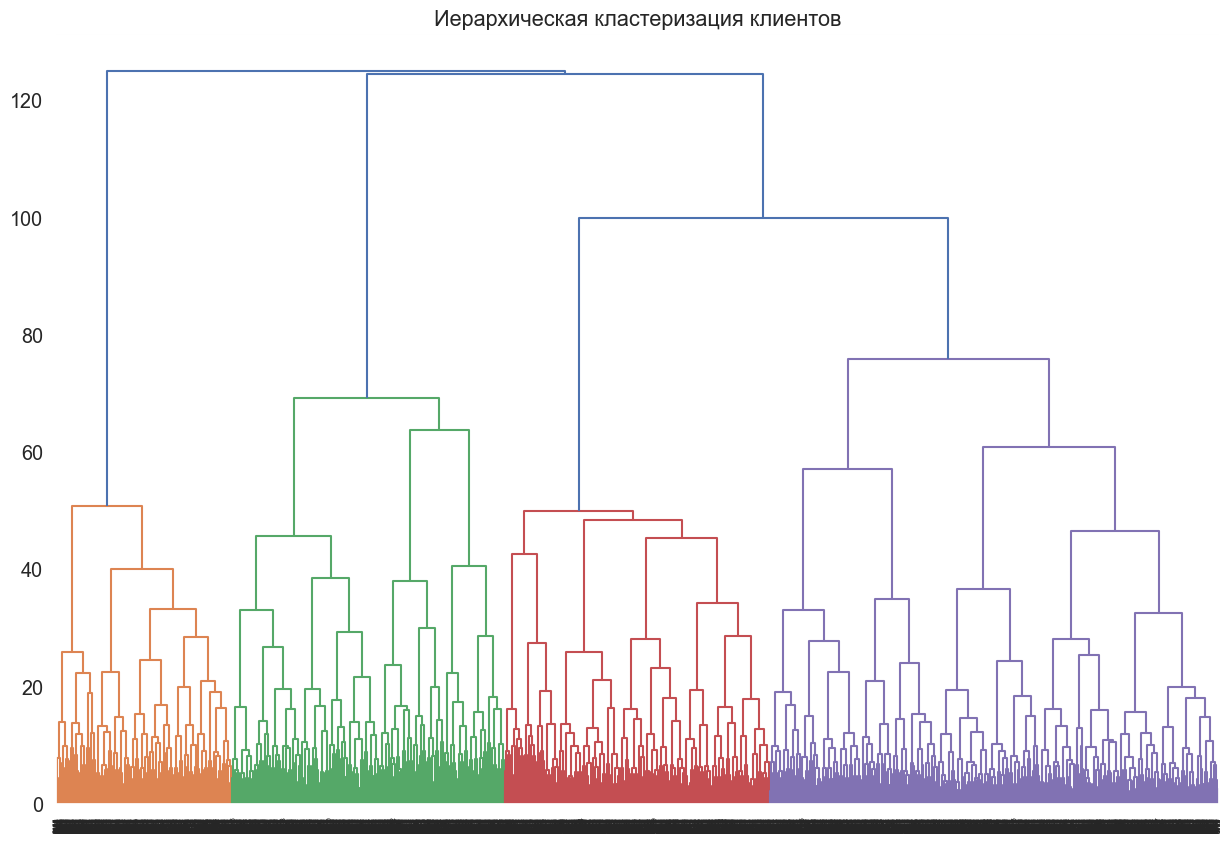

In [60]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

Метод иерархической кластеризации предлагает разделить клиентов на 4 кластера, дополнительно проверим количество кластеров "методом локтя"

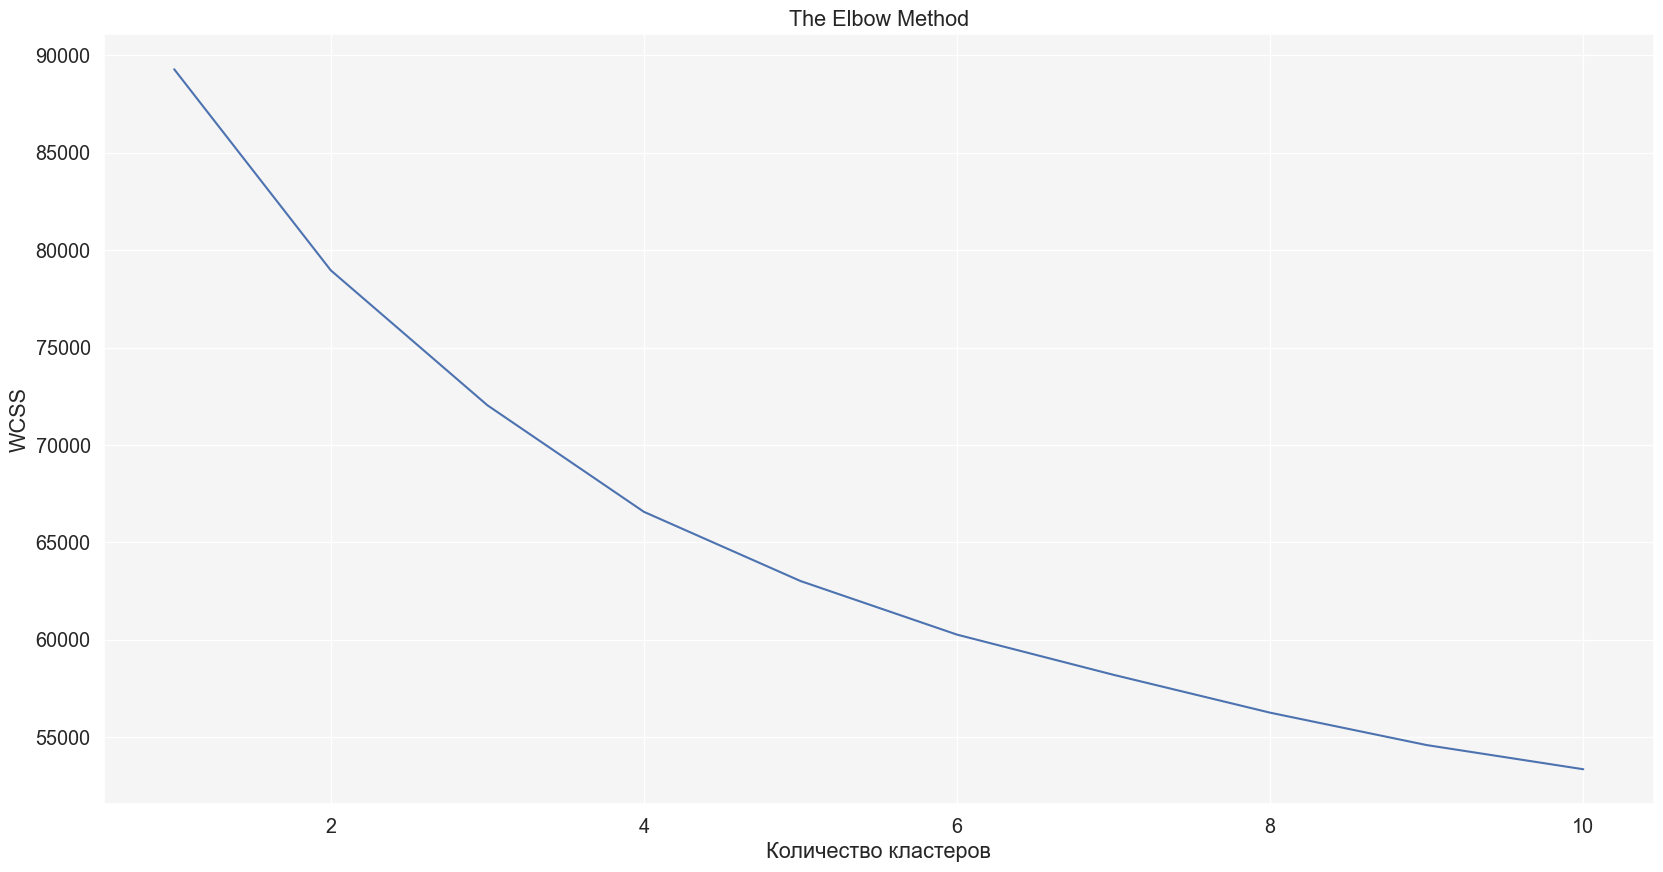

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

4 кластера самое то

Применим алгоритм k-means с числом кластеров 4

In [70]:
km = KMeans(n_clusters=4, random_state=0)

In [71]:
labels = km.fit_predict(x_sc)

In [72]:
cluster1['cluster_km'] = labels

In [73]:
cluster1.groupby(by='cluster_km').mean()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,gender_М
cluster_km,,,,,,,,,,,,
0,834.87,43.52,3.13,"536,339.60",1.90,0.65,0.53,"100,845.11",0.11,0.00,1.00,0.44
1,882.94,42.46,4.39,"1,216,919.71",2.61,0.44,0.66,"152,954.12",0.68,0.04,0.19,0.57
2,825.84,42.21,3.02,"480,048.47",1.94,0.78,0.43,"105,425.21",0.08,0.00,0.00,0.46
3,832.65,44.17,3.28,"566,820.26",1.95,0.57,0.52,"97,016.68",0.19,1.00,0.00,0.46


__Вывод__

Очень интересный получился кластер под номером 1, он характеризует среднего клиента, желающим покинуть банк. 

Судя по нему можно сказать, что в основном это мужчины старше 40 лет, преимущественно из Ярославля, которые были активными клиентами банка. В среднем у них больше 2-х банковских продукта, а также, имеющие средний балл кредитного скоринга.

На основе перечисленных характеристик, в особенности географической зависимости, можно предположить, что клиенты банка уходят из-за появления новых, более выгодных банковских продуктов у банков-конкурентов.

На основе имеющихся данных, можно порекомендовать следующее:

- Провести анализ конкурентов, выявить их сильные и слабые стороны;

- Пересмотреть условия предоставления имеющихся банковских продуктов и сделать их более конкурентноспособными;

- Следует обратить внимание на офисы расположенные в г.Ярославль, найти причину того, что большая часть клиентов оттока именно оттуда.